In [6]:
import pandas as pd
import os
import torch
import numpy as np

from utils import ROOT_DIR
from torch_geometric.data import Data
from visualize._utils import draw_connectome

from sklearn import preprocessing

Attributes: 
 <bound method BaseData.keys of Data(
  x=[302, 1024],
  edge_index=[2, 3363],
  edge_attr=[3363, 2],
  y=[302],
  pos={
    0=[2],
    1=[2],
    2=[2],
    3=[2],
    4=[2],
    5=[2],
    6=[2],
    7=[2],
    8=[2],
    9=[2],
    10=[2],
    11=[2],
    12=[2],
    13=[2],
    14=[2],
    15=[2],
    16=[2],
    17=[2],
    18=[2],
    19=[2],
    20=[2],
    21=[2],
    22=[2],
    23=[2],
    24=[2],
    25=[2],
    26=[2],
    27=[2],
    28=[2],
    29=[2],
    30=[2],
    31=[2],
    32=[2],
    33=[2],
    34=[2],
    35=[2],
    36=[2],
    37=[2],
    38=[2],
    39=[2],
    40=[2],
    41=[2],
    42=[2],
    43=[2],
    44=[2],
    45=[2],
    46=[2],
    47=[2],
    48=[2],
    49=[2],
    50=[2],
    51=[2],
    52=[2],
    53=[2],
    54=[2],
    55=[2],
    56=[2],
    57=[2],
    58=[2],
    59=[2],
    60=[2],
    61=[2],
    62=[2],
    63=[2],
    64=[2],
    65=[2],
    66=[2],
    67=[2],
    68=[2],
    69=[2],
    70=[2],
    71=[2],
    72=[2],


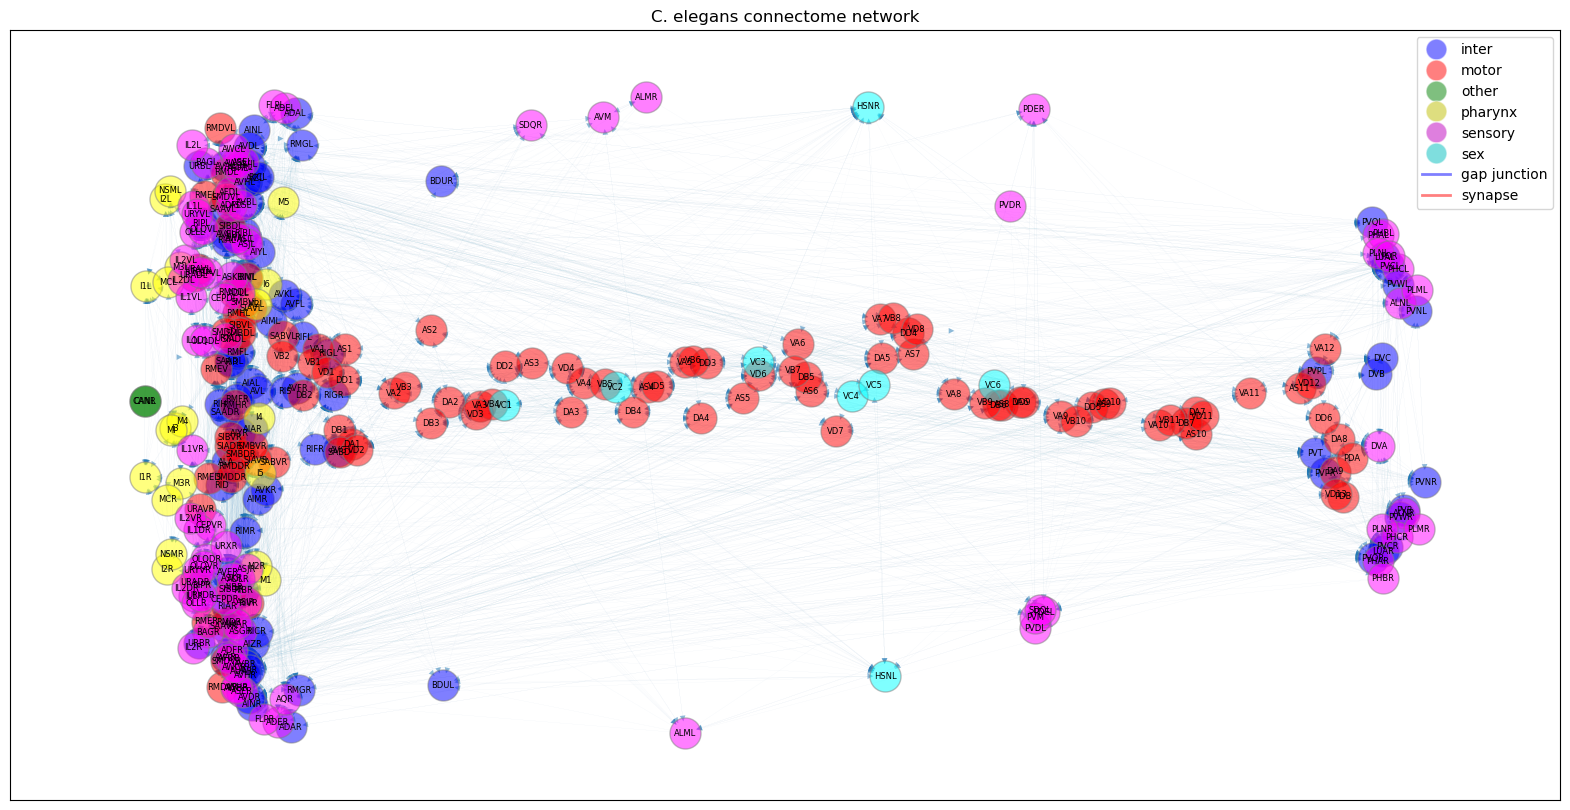

In [20]:
df = pd.read_csv("../data/raw/OpenWormConnectome.csv")
        
origin = []
target = []
edges = []

# CANL, CANR not considered neurons in Cook et al (still include in matrix - data will be zero/null when passed to model)

for i in range(len(df)):
    neuron1 = df.loc[i, "Origin"]
    neuron2 = df.loc[i, "Target"]
    origin += [neuron1]
    target += [neuron2]
    edges += [[neuron1, neuron2]]

# muscle_neurons = []
# df = pd.read_csv("../data/raw/OpenWormMuscle.csv")
# for i in range(len(df)):
#     muscle_neurons += [df.loc[i, "Neuron"]]

# sensory_neurons = []
# df = pd.read_csv("../data/raw/OpenWormSensory.csv")
# for i in range(len(df)):
#     sensory_neurons += [df.loc[i, "Neuron"]]

total_neurons = [ # TODO: Cite source of this list.
            "ADAL", "ADAR", "ADEL", "ADER", "ADFL", "ADFR", "ADLL", "ADLR", "AFDL", "AFDR",
            "AIAL", "AIAR", "AIBL", "AIBR", "AIML", "AIMR", "AINL", "AINR", "AIYL", "AIYR",
            "AIZL", "AIZR", "ALA", "ALML", "ALMR", "ALNL", "ALNR", "AQR", "AS1", "AS10",
            "AS11", "AS2", "AS3", "AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "ASEL", "ASER",
            "ASGL", "ASGR", "ASHL", "ASHR", "ASIL", "ASIR", "ASJL", "ASJR", "ASKL", "ASKR",
            "AUAL", "AUAR", "AVAL", "AVAR", "AVBL", "AVBR", "AVDL", "AVDR", "AVEL", "AVER",
            "AVFL", "AVFR", "AVG", "AVHL", "AVHR", "AVJL", "AVJR", "AVKL", "AVKR", "AVL",
            "AVM", "AWAL", "AWAR", "AWBL", "AWBR", "AWCL", "AWCR", "BAGL", "BAGR", "BDUL",
            "BDUR", "CANL", "CANR", "CEPDL", "CEPDR", "CEPVL", "CEPVR", "DA1", "DA2", "DA3",
            "DA4", "DA5", "DA6", "DA7", "DA8", "DA9", "DB1", "DB2", "DB3", "DB4", "DB5",
            "DB6", "DB7", "DD1", "DD2", "DD3", "DD4", "DD5", "DD6", "DVA", "DVB", "DVC",
            "FLPL", "FLPR", "HSNL", "HSNR", "I1L", "I1R", "I2L", "I2R", "I3", "I4", "I5",
            "I6", "IL1DL", "IL1DR", "IL1L", "IL1R", "IL1VL", "IL1VR", "IL2DL", "IL2DR", "IL2L",
            "IL2R", "IL2VL", "IL2VR", "LUAL", "LUAR", "M1", "M2L", "M2R", "M3L", "M3R", "M4",
            "M5", "MCL", "MCR", "MI", "NSML", "NSMR", "OLLL", "OLLR", "OLQDL", "OLQDR",
            "OLQVL", "OLQVR", "PDA", "PDB", "PDEL", "PDER", "PHAL", "PHAR", "PHBL", "PHBR",
            "PHCL", "PHCR", "PLML", "PLMR", "PLNL", "PLNR", "PQR", "PVCL", "PVCR", "PVDL",
            "PVDR", "PVM", "PVNL", "PVNR", "PVPL", "PVPR", "PVQL", "PVQR", "PVR", "PVT",
            "PVWL", "PVWR", "RIAL", "RIAR", "RIBL", "RIBR", "RICL", "RICR", "RID", "RIFL",
            "RIFR", "RIGL", "RIGR", "RIH", "RIML", "RIMR", "RIPL", "RIPR", "RIR", "RIS",
            "RIVL", "RIVR", "RMDDL", "RMDDR", "RMDL", "RMDR", "RMDVL", "RMDVR", "RMED",
            "RMEL", "RMER", "RMEV", "RMFL", "RMFR", "RMGL", "RMGR", "RMHL", "RMHR", "SAADL",
            "SAADR", "SAAVL", "SAAVR", "SABD", "SABVL", "SABVR", "SDQL", "SDQR", "SIADL",
            "SIADR", "SIAVL", "SIAVR", "SIBDL", "SIBDR", "SIBVL", "SIBVR", "SMBDL", "SMBDR",
            "SMBVL", "SMBVR", "SMDDL", "SMDDR", "SMDVL", "SMDVR", "URADL", "URADR", "URAVL",
            "URAVR", "URBL", "URBR", "URXL", "URXR", "URYDL", "URYDR", "URYVL", "URYVR",
            "VA1", "VA10", "VA11", "VA12", "VA2", "VA3", "VA4", "VA5", "VA6", "VA7", "VA8",
            "VA9", "VB1", "VB10", "VB11", "VB2", "VB3", "VB4", "VB5", "VB6", "VB7", "VB8",
            "VB9", "VC1", "VC2", "VC3", "VC4", "VC5", "VC6", "VD1", "VD10", "VD11", "VD12",
            "VD13", "VD2", "VD3", "VD4", "VD5", "VD6", "VD7", "VD8", "VD9"
        ]

neuron_to_idx = dict(zip(total_neurons, [i for i in range(len(total_neurons))]))
idx_to_neuron = dict(zip([i for i in range(len(total_neurons))], total_neurons))

edge_index = torch.tensor([[neuron_to_idx[neuron1], neuron_to_idx[neuron2]] for neuron1, neuron2 in edges]).T
node_type = {0: 'Type1', 1: 'Type2'}
num_classes = len(node_type)
n_id = torch.tensor([i for i in range(len(total_neurons))])

# for x, y values
# Neurons involved in chemical synapses
GHermChem_Nodes = pd.read_csv("../data/raw/GHermChem_Nodes.csv")  # nodes
neurons_all = set(total_neurons)

df = GHermChem_Nodes
df["Name"] = [v.replace("0", "") if not v.endswith("0") else v for v in df["Name"]]
Gsyn_nodes = df[df["Name"].isin(neurons_all)].sort_values(by=["Name"]).reset_index()

le = preprocessing.LabelEncoder()
le.fit(Gsyn_nodes.Group.values)
# num_classes = len(le.classes_)
y = torch.tensor(le.transform(Gsyn_nodes.Group.values), dtype=torch.int32)
x = torch.randn(len(total_neurons), 1024, dtype=torch.float)

temp_graph_tensors = torch.load(
    os.path.join(ROOT_DIR, "data", "processed", "connectome", "graph_tensors.pt")
)

# pos = dict(zip([i for i in range(len(total_neurons))], [np.random.randn(2) for i in range(len(total_neurons))]))
pos = temp_graph_tensors["pos"]
edge_attr = torch.cat((torch.ones(edge_index.shape[-1], 1), torch.zeros(edge_index.shape[-1], 1)), dim=-1)

graph_tensors = {
    "edge_index": edge_index,
    "edge_attr": edge_attr,
    "pos": pos,
    "num_classes": num_classes,
    "x": x,
    "y": y,
    "idx_to_neuron": idx_to_neuron,
    "node_type": node_type,
    "n_id": n_id,
}

torch.save(
    graph_tensors,
    os.path.join(ROOT_DIR, "data", "processed", "connectome", "open_worm_graph_tensors.pt"),
)

# make the graph
graph = Data(**graph_tensors)

# investigate the graph
print(
    "Attributes:",
    "\n",
    graph.keys,
    "\n",
    f"Num. nodes {graph.num_nodes}, Num. edges {graph.num_edges}, "
    f"Num. node features {graph.num_node_features}",
    end="\n",
)
print(f"\tHas isolated nodes: {graph.has_isolated_nodes()}")
print(f"\tHas self-loops: {graph.has_self_loops()}")
print(f"\tIs undirected: {graph.is_undirected()}")
print(f"\tIs directed: {graph.is_directed()}")

# draw the connectome
draw_connectome(graph)